In [191]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [192]:
# create some data (assume 2 classes from different Gaussian distributions)

n = 200

mean_pos = (1,2)
mean_neg = (-3,-6)
var = 4

x_pos = np.random.normal(loc=mean_pos, scale=var, size=(n/2,2))
x_pos = np.append(x_pos,np.ones((n/2,1)),axis=1)

x_neg = np.random.normal(loc=mean_neg, scale=var, size=(n/2,2))
x_neg = np.append(x_neg,np.zeros((n/2,1)),axis=1)

x = np.append(x_pos, x_neg, axis=0)

In [193]:
#positive cases
print x[:5,:]
#negative cases
print x[-5:,:]

[[-3.22824815 -2.2664753   1.        ]
 [-2.86886087 -1.18044326  1.        ]
 [ 1.11566325  4.5508007   1.        ]
 [-3.02758552 -0.05712717  1.        ]
 [ 1.64861955  4.78033956  1.        ]]
[[ -8.92727005 -10.95705637   0.        ]
 [  1.53229387  -1.83719002   0.        ]
 [  0.61309887  -9.91413121   0.        ]
 [ -5.47710359  -6.76214406   0.        ]
 [  2.89047479  -3.84053693   0.        ]]


<function matplotlib.pyplot.show>

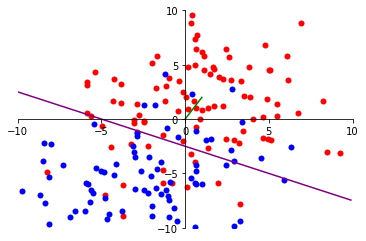

In [194]:
# plot the data, show v and decision boundary for v' = [1,2], b = 5

fig, ax = plt.subplots()

gs = 10
ax.set_xlim(-gs, gs)
ax.set_ylim(-gs, gs)

plt.scatter(x_pos[:,0], x_pos[:,1], c="r")
plt.scatter(x_neg[:,0], x_neg[:,1], c="b")

# sort out axes
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot v
v = [0,2]
plt.plot(v,c="g")

# plot boundary
b_x_1 = np.arange(-gs, gs, 0.1)
b_x_2 = -b_x_1/2 - 2.5
plt.plot(b_x_1, b_x_2, c="purple")

plt.show

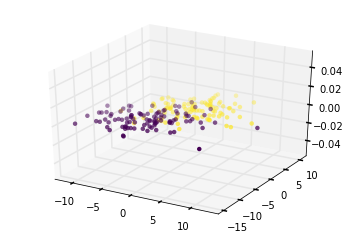

In [195]:
# plot data in the (x1,x2)-plane

fig = plt.figure()
ax = plt.axes(projection='3d')

z = x[:,2]
x1 = x[:,0]
x2 = x[:,1]

ax.scatter(x1, x2, 0, c=z)

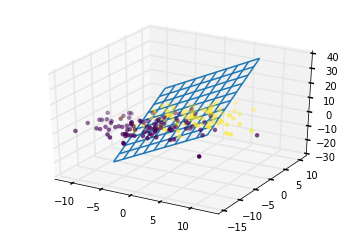

In [196]:
# logistic regression assigns a value f(x) to each point in the (x1, x2)-plane in a new dimension
# where f(x) = v'x + b, i.e. a plane
# decision boundary = where f(x)=0, i.e. cuts through the (x1, x2)-plane
#    i.e. data points falling one side we believe to be the 0-class, the other side we consider the "1"s

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x1, x2, 0, c=z)

x1_range = np.outer(np.linspace(-8, 8, 10), np.ones(10))
x2_range = x1_range.copy().T
plane = x1_range * 2 + x2_range * 2 + 5
sigmoid = 1 / (1 + np.exp(-plane))

#ax.set_zlim(-1.5, 1.5)

ax.plot_wireframe(x1_range, x2_range, plane)

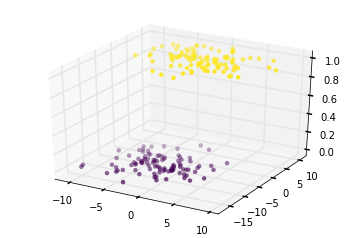

In [197]:
# we ultimately want function values that fit the data labels

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x_1, x_2, z, c=z)

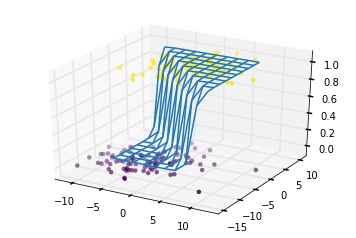

In [198]:
# apply sigmoid to planar values (v'x + b)
# i.e. f(x) = sigmoid(v'x + b) and compare to true label values, y, (which are now comparable)
# so fit parameters (i.e. w & b) to get lowest loss (i.e. difference between f(x) and ys)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x1, x2, z, c=z)
ax.set_zlim(-.1, 1.1)

ax.plot_wireframe(x1_range, x2_range, sigmoid)


In [199]:
# As the function f(x) "sits over" the subspace of the data, we consider countours of it within the 
# subspace of the data, i.e. lines in which f(x) is constant.